# EDA

Steps - 
1. First, check null() and visualize to better understand.
2. Check the relation of what we need to find with the features available in the dataset.
3. Try using heatmaps, displot, countplot, histplot, pairplot, etc.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
url='https://raw.githubusercontent.com/krishnaik06/EDA1/refs/heads/master/titanic_train.csv'
df=pd.read_csv(url)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

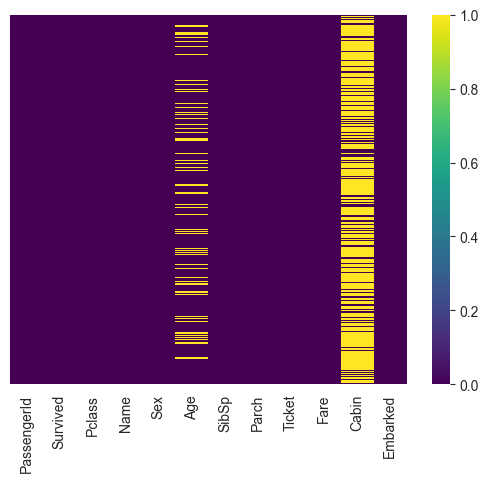

In [65]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

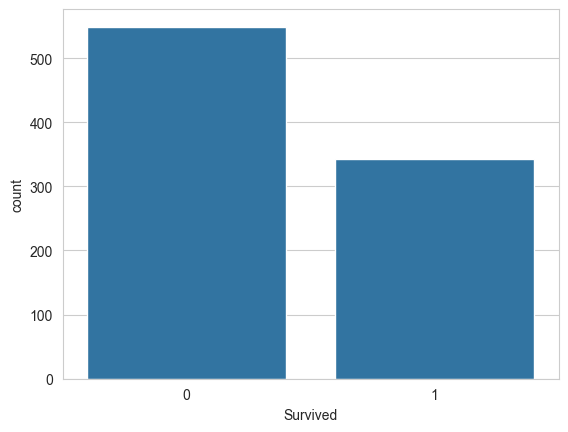

In [66]:
sns.set_style('whitegrid')  #to add grid in the background 
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

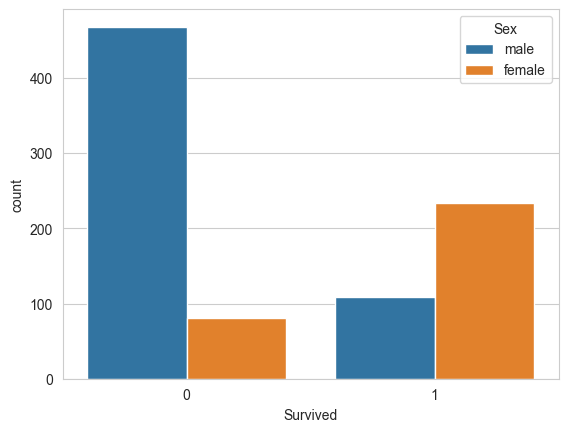

In [67]:
sns.countplot(x='Survived', data=df, hue='Sex')

In [68]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

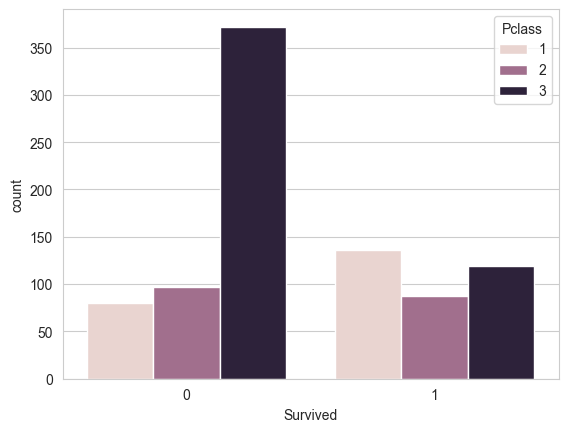

In [69]:
sns.countplot(x='Survived', data=df, hue='Pclass')

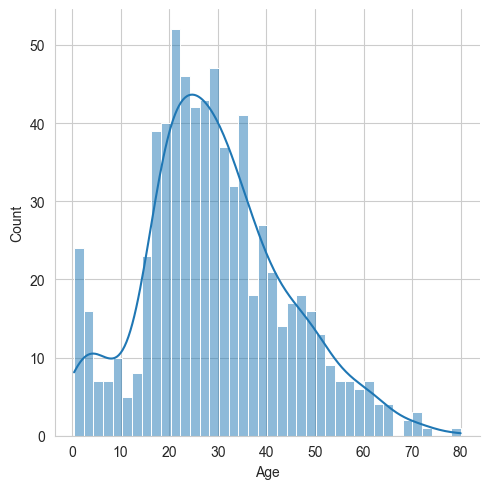

In [70]:
sns.displot(df['Age'].dropna(), kde=True, bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

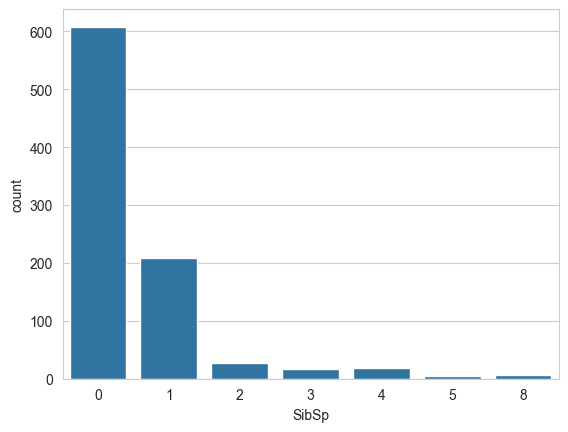

In [71]:
sns.countplot(x='SibSp', data=df)

# Data Cleaning

1. The first thing is to remove or modify the null values accordingly.
2. Box plot can help you determine the mean, median, outliers and percentile of the data.

<Axes: ylabel='Age'>

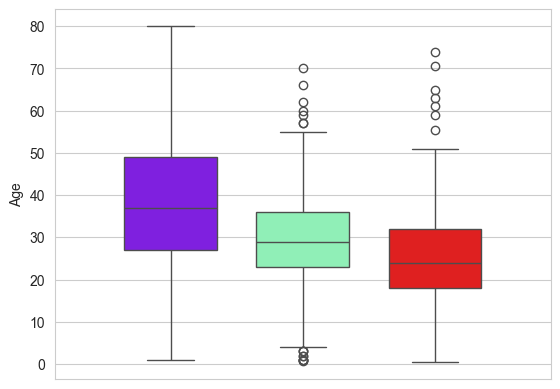

In [72]:
sns.boxplot(y='Age', hue='Pclass', data=df, palette='rainbow', legend=False, gap=0.3)

In [73]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [74]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

/var/folders/b9/4gpq7ymn3bl644b4pj8r9rv80000gn/T/ipykernel_1687/2689791175.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/b9/4gpq7ymn3bl644b4pj8r9rv80000gn/T/ipykernel_1687/2689791175.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

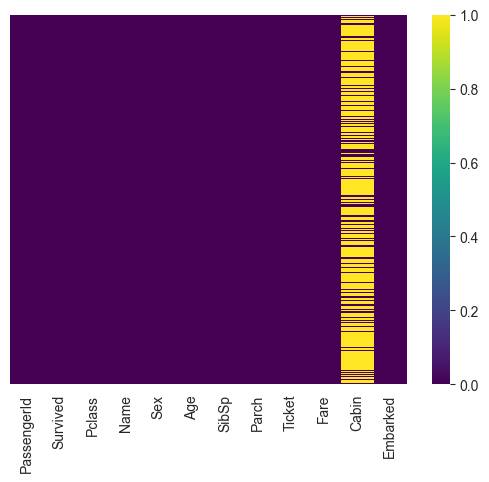

In [75]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

<Axes: >

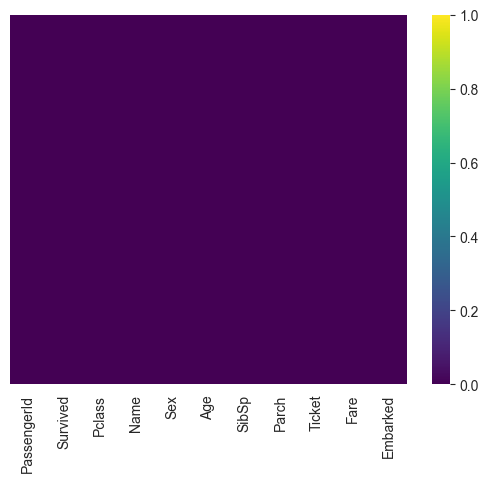

In [76]:
df.drop('Cabin', axis=1, inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting categorical features

1. using pd.get_dummies

In [78]:
sex = pd.get_dummies(data=df['Sex'], drop_first=True)
embark = pd.get_dummies(data=df['Embarked'], drop_first=True)

In [79]:
df.drop(['Sex', 'Embarked', 'Name', 'PassengerId'], axis=1, inplace=True)
# not found because it was already deleted

In [80]:
df['sex']=sex

In [81]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,sex
0,0,3,22.0,1,0,A/5 21171,7.2500,True
1,1,1,38.0,1,0,PC 17599,71.2833,False
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,False
3,1,1,35.0,1,0,113803,53.1000,False
4,0,3,35.0,0,0,373450,8.0500,True


In [83]:
df = pd.concat([df,embark], axis=1)

In [84]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,sex,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,True,False,True
1,1,1,38.0,1,0,PC 17599,71.2833,False,False,False
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,1,1,35.0,1,0,113803,53.1000,False,False,True
4,0,3,35.0,0,0,373450,8.0500,True,False,True


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
X_train.drop('Ticket', axis=1, inplace=True)
X_test.drop('Ticket', axis=1, inplace=True)

In [92]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

/Users/manishkumarkushwaha/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
predictions = lm.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [97]:
accuracy = confusion_matrix(y_test, predictions)

In [98]:
accuracy

array([[153,  22],
       [ 32,  88]])

In [99]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8169491525423729